<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_10%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
X = [[1.0], [2.0], [3.0], [4.0], [5.0]]
y = [1.0, 2.0, 1.6, 3.8, 2.3 ]
reg.fit(X, y)

LinearRegression()

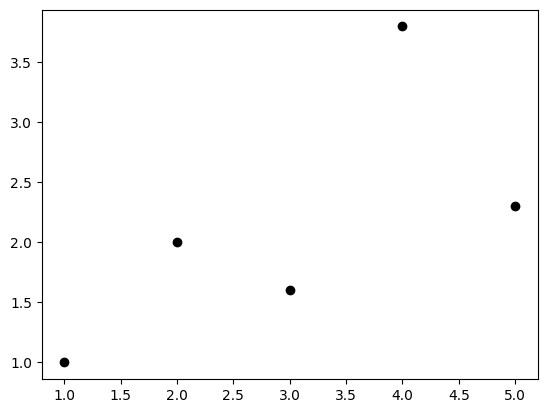

In [ ]:
plt.scatter(X, y, color='black')

In [ ]:
y_pred = reg.predict(X)

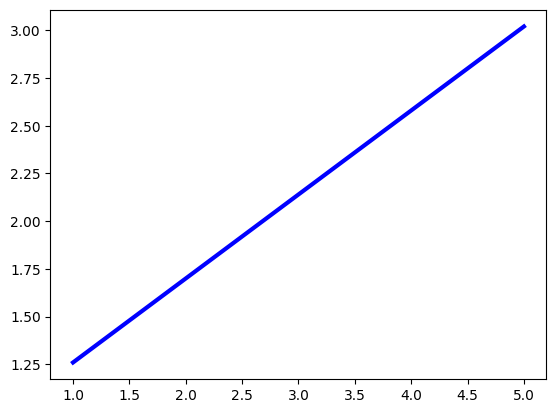

In [ ]:
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [7]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [8]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)


Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.6107 - sparse_categorical_accuracy: 0.8318 - val_loss: 0.1913 - val_sparse_categorical_accuracy: 0.9456
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1709 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.1331 - val_sparse_categorical_accuracy: 0.9587
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1195 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1056 - val_sparse_categorical_accuracy: 0.9675
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0956 - val_sparse_categorical_accuracy: 0.9718
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.0836 - val_sparse_categorical_accuracy: 0.9739
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0775 - val_sparse_categorical_accuracy: 0.9769


In [10]:
# 1. 테스트 데이터 평가
test_loss, test_acc = model.evaluate(ds_test)
print("테스트 손실(loss):", test_loss)
print("테스트 정확도(accuracy):", test_acc)

# 2. 예측 예시 확인
for images, labels in ds_test.take(1):
    logits = model(images)
    probs = tf.nn.softmax(logits, axis=1)
    preds = tf.argmax(probs, axis=1)

    labels_np = labels.numpy()
    preds_np = preds.numpy()

    print("실제 라벨   :", labels_np[:10])
    print("예측 라벨   :", preds_np[:10])

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9754
테스트 손실(loss): 0.07747001200914383
테스트 정확도(accuracy): 0.9768999814987183
실제 라벨   : [2 0 4 8 7 6 0 6 3 1]
예측 라벨   : [2 0 4 8 7 6 0 6 3 1]
